Disclaimer: The goal of this code is to study how to recreate H-R Diagram of a stellar cluster (in this case Pleiades) using DBSCAN clustering algorithm from sklearn. I'm sorry if the method is not so scientific.

The data is downloaded from Gaia early data release 3 (Gaia Collaboration, 2020, Gaia EDR3, Version 1.0. https://doi.org/10.5270/esa-1ugzkg7). he data I'm using is downloaded from Gaia early data release 3 downloaded from https://gea.esac.esa.int/archive/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
# The data I'm using is downloaded from Gaia early data release 3 downloaded from https://gea.esac.esa.int/archive/
filename = "1628678882413O-result.csv"
data = pd.read_csv(filename,delimiter=",")

In [3]:
print(data.columns)

Index(['source_id', 'ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec',
       'phot_g_mean_mag', 'bp_rp', 'bp_g', 'g_rp', 'dr2_radial_velocity',
       'dr2_radial_velocity_error'],
      dtype='object')


In [4]:
# We will only use some of the columns for out new data

sel_col = ['ra','dec', 'pmra', 'pmdec', 'parallax','bp_rp', 'bp_g', 'g_rp', 'phot_g_mean_mag'] # You can modify this to add or remove any column you don't want to include in the new dataframe
sel_data = data[sel_col]
print(sel_data.columns)

Index(['ra', 'dec', 'pmra', 'pmdec', 'parallax', 'bp_rp', 'bp_g', 'g_rp',
       'phot_g_mean_mag'],
      dtype='object')


In [5]:
sel_data.head()

,ra,dec,pmra,pmdec,parallax,bp_rp,bp_g,g_rp,phot_g_mean_mag
0,55.655919,24.075143,1.606233,1.122345,0.135407,1.314144,0.270056,1.044088,20.483800
1,55.658311,24.104435,3.740004,1.797421,-3.836704,2.195143,0.715630,1.479513,20.756730
2,55.679300,24.107571,4.130701,-1.422831,0.645027,1.806950,0.989151,0.817799,18.796360
3,55.678330,24.092589,116.924054,56.468247,2.371769,1.404465,0.632445,0.772019,15.463922
4,55.679168,24.101278,NaN,NaN,NaN,1.753218,-1.860857,3.614075,20.233032


In [6]:
c_data = sel_data.dropna(subset= ['pmra', 'pmdec', 'parallax','bp_rp', 'bp_g', 'g_rp', 'phot_g_mean_mag']).reset_index()

In [7]:
c_data = c_data[(c_data['parallax'] > 0.0)].reset_index(drop=True)
df = c_data.to_numpy().astype('float32', copy = False) # New data frame to fit

In [8]:
np.shape(df)

(19962, 10)

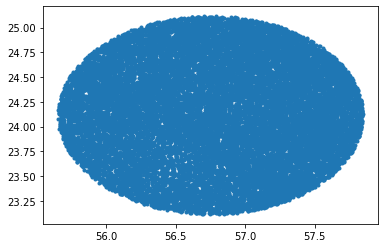

In [9]:
plt.scatter(c_data['ra'],c_data['dec'], marker = '.')

(-100.0, 150.0)

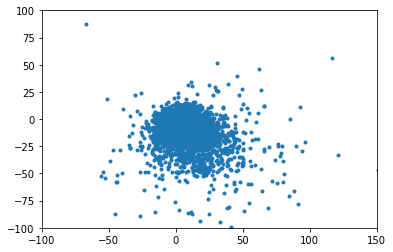

In [10]:
plt.scatter(c_data['pmra'],c_data['pmdec'], marker = '.')
plt.ylim(-100,100)
plt.xlim(-100,150)

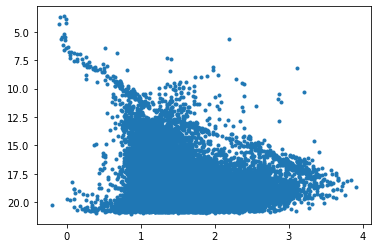

In [11]:
plt.scatter(c_data['bp_rp'],c_data['phot_g_mean_mag'], marker = '.')
ax = plt.gca()
ax.invert_yaxis()

In [12]:
sts_data = StandardScaler().fit(df)
std_df = sts_data.transform(df)

In [13]:
clust_db = DBSCAN(eps=1, min_samples=2).fit(std_df) # Using the dataset from above

19962
[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160]


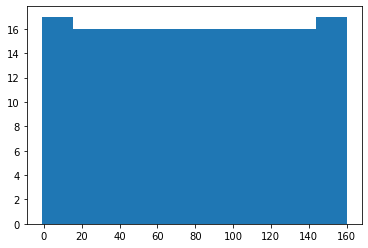

In [14]:
arr_label = np.array(clust_db.labels_)
print(len(arr_label))
label_cts = np.unique(arr_label)
plt.hist(label_cts)
print(label_cts)

In [15]:
c_data['labels'] = arr_label
print(c_data.head())

   index         ra        dec        pmra      pmdec  parallax     bp_rp  \
0      0  55.655919  24.075143    1.606233   1.122345  0.135407  1.314144   
1      2  55.679300  24.107571    4.130701  -1.422831  0.645027  1.806950   
2      3  55.678330  24.092589  116.924054  56.468247  2.371769  1.404465   
3      5  55.691564  24.105151    0.428834  -2.289468  0.315051  1.462992   
4      6  55.686891  24.116575   -9.090034 -34.757692  2.295703  2.396061   

       bp_g      g_rp  phot_g_mean_mag  labels  
0  0.270056  1.044088        20.483800       0  
1  0.989151  0.817799        18.796360       0  
2  0.632445  0.772019        15.463922      -1  
3  0.685369  0.777622        18.857517       0  
4  1.247057  1.149004        18.123705      -1  


In [16]:
dbc_data = c_data[c_data['labels']!=-1]

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

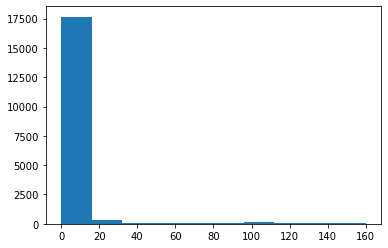

In [17]:
plt.hist(dbc_data['labels'], bins = 10)
plt.xticks()

(array([ 35.,  62.,  75.,  74.,  32.,  10.,  12.,   9., 371.,  82.]),
 array([3.58836979e-03, 8.37798048e-01, 1.67200773e+00, 2.50621740e+00,
        3.34042708e+00, 4.17463676e+00, 5.00884644e+00, 5.84305612e+00,
        6.67726579e+00, 7.51147547e+00, 8.34568515e+00]),
 <BarContainer object of 10 artists>)

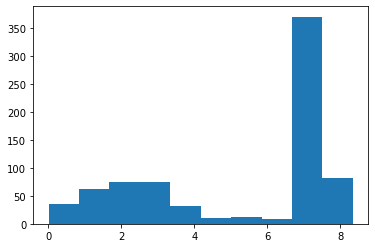

In [18]:
sel_cluster = dbc_data[(dbc_data['labels'] != 15) & (dbc_data['labels'] >= 15)]
plt.hist(sel_cluster['parallax'])

In [19]:
sel_cluster = sel_cluster[sel_cluster['parallax']>=4] # Clean the data further by restricting the parallax (not so scientific way)

Text(0.5, 1.0, 'HR Diagram of Pleiades')

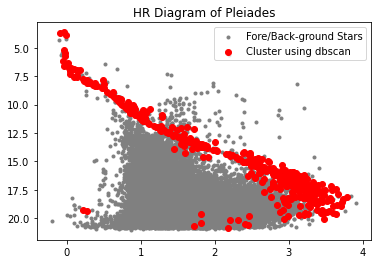

In [21]:
plt.scatter(c_data['bp_rp'],c_data['phot_g_mean_mag'], color = 'grey', marker = '.', label = 'Fore/Back-ground Stars')
plt.scatter(sel_cluster['bp_rp'], sel_cluster['phot_g_mean_mag'], label = 'Cluster using dbscan', color = 'red')
ax = plt.gca()
ax.invert_yaxis()
plt.legend()
plt.title('HR Diagram of Pleiades')

Somehow I managed to show the HR Diagram despite not very clean

From the diagram, we can see that Pleiades is an open cluster system with main sequence stars (red).